In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [6]:
train=pd.read_csv('data/train.csv')
test=pd.read_csv('data/test.csv')

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train_null=train.isnull().sum()
train_null[train_null>0].sort_values(ascending=False)

Cabin       687
Age         177
Embarked      2
dtype: int64

74.20382165605095
18.890814558058924


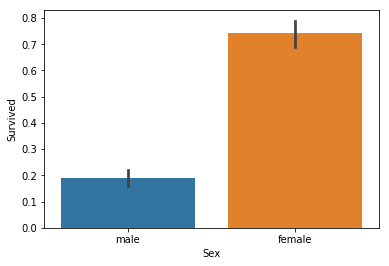

In [9]:
sns.barplot(x='Sex',y='Survived',data=train)

print(train['Survived'][train['Sex']=='female'].value_counts(normalize=True)[1]*100)
print(train['Survived'][train['Sex']=='male'].value_counts(normalize=True)[1]*100)

In [10]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

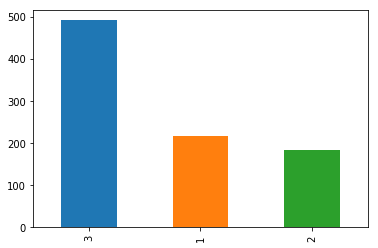

In [13]:
train['Pclass'].value_counts().plot.bar()


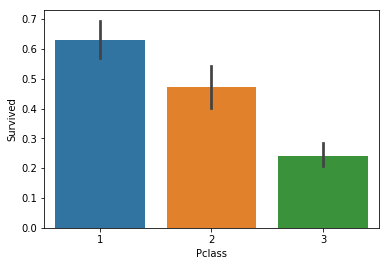

In [14]:
sns.barplot(x='Pclass',y='Survived',data=train)

In [15]:
train['Age']=train.Age.fillna(-0.5)
test['Age']=test.Age.fillna(-0.5)

In [16]:
bins=[-1,0,5,12,18,24,35,60,np.inf]
labels=['Unknown','Baby','Child','Student','College',' Adult','Senior Adult','Senior']

train['Agegroup']=pd.cut(train['Age'],bins,labels=labels)
test['Agegroup']=pd.cut(test['Age'],bins,labels=labels)

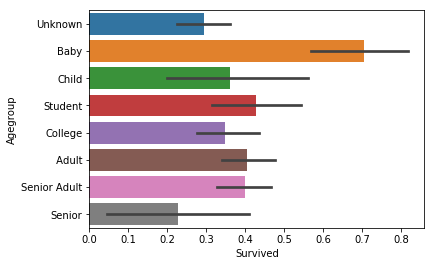

In [17]:
sns.barplot(x='Survived',y='Agegroup',data=train)

In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agegroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,College
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Senior Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult


In [19]:
combine=[train,test]

In [20]:
for dataset in combine:
    dataset['Title']=dataset.Name.str.extract(' ([A-Za-z]+)\.',expand=False)
  
   

In [21]:
pd.crosstab(train['Title'],train['Survived'])

Survived,0,1
Title,,
Capt,1,0
Col,1,1
Countess,0,1
Don,1,0
Dr,4,3
Jonkheer,1,0
Lady,0,1
Major,1,1
Master,17,23


In [22]:
for dataset in combine:
    dataset['Title']=dataset['Title'].replace(['Lady','Capt','Col','Don','Dr','Major',
                                              'Rev','Jonkheer','Dona'],'Rare')
    
    dataset['Title']=dataset['Title'].replace(['Countess','Lady','Sir'],'Royal')
    
    dataset['Title']=dataset['Title'].replace(['Mlle','Ms'],'Miss')
    
    dataset['Title']=dataset['Title'].replace('Mme','Mrs')

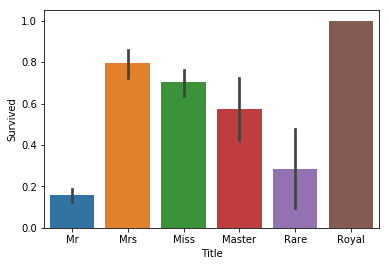

In [23]:
sns.barplot(x='Title',y='Survived',data=train)

In [24]:
title_mapping = {"Mr": 1, "Mrs": 2, "Miss": 3, "Master": 4, "Rare": 5, "Royal": 6}

for dataset in combine:
    dataset['Title']=dataset['Title'].map(title_mapping)
    dataset['Title']=dataset['Title'].fillna(0)
    


In [25]:
train.Title.value_counts()

1    517
3    185
2    126
4     40
5     21
6      2
Name: Title, dtype: int64

In [26]:
mr_age = train[train["Title"] == 1]["Agegroup"].mode() #Young Adult
miss_age = train[train["Title"] == 3]["Agegroup"].mode() #Student
mrs_age = train[train["Title"] == 2]["Agegroup"].mode() #Adult
master_age = train[train["Title"] == 4]["Agegroup"].mode() #Baby
royal_age = train[train["Title"] == 5]["Agegroup"].mode() #Adult
rare_age = train[train["Title"] == 6]["Agegroup"].mode() #Adult

In [27]:
print(mr_age)

0     Adult
Name: Agegroup, dtype: category
Categories (8, object): [Unknown < Baby < Child < Student < College < Adult < Senior Adult < Senior]


In [28]:
train.Title.value_counts()

1    517
3    185
2    126
4     40
5     21
6      2
Name: Title, dtype: int64

In [29]:
train.sample(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agegroup,Title
637,638,0,2,"Collyer, Mr. Harvey",male,31.0,1,1,C.A. 31921,26.2500,NaN,S,Adult,1
497,498,0,3,"Shellard, Mr. Frederick William",male,-0.5,0,0,C.A. 6212,15.1000,NaN,S,Unknown,1
356,357,1,1,"Bowerman, Miss. Elsie Edith",female,22.0,0,1,113505,55.0000,E33,S,College,3
269,270,1,1,"Bissette, Miss. Amelia",female,35.0,0,0,PC 17760,135.6333,C99,S,Adult,3
177,178,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C49,C,Senior Adult,3
207,208,1,3,"Albimona, Mr. Nassef Cassem",male,26.0,0,0,2699,18.7875,NaN,C,Adult,1
287,288,0,3,"Naidenoff, Mr. Penko",male,22.0,0,0,349206,7.8958,NaN,S,College,1
360,361,0,3,"Skoog, Mr. Wilhelm",male,40.0,1,4,347088,27.9000,NaN,S,Senior Adult,1
526,527,1,2,"Ridsdale, Miss. Lucy",female,50.0,0,0,W./C. 14258,10.5000,NaN,S,Senior Adult,3
628,629,0,3,"Bostandyeff, Mr. Guentcho",male,26.0,0,0,349224,7.8958,NaN,S,Adult,1


In [30]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agegroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,College,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Senior Adult,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,1


In [31]:
train_null=train.isnull().sum()
train_null[train_null>0].sort_values(ascending=True)

Embarked      2
Cabin       687
dtype: int64

In [32]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [33]:
train=train.fillna({"Embarked":"S"})

In [34]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agegroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,College,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Senior Adult,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,1


In [35]:
sex_mapping={"male":0,"female":1}

train['Sex']=train['Sex'].map(sex_mapping)
test['Sex']=train['Sex'].map(sex_mapping)

In [36]:
train.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [37]:
embarked_mapping={"S":0,"C":1,"Q":2}

train['Embarked']=train['Embarked'].map(embarked_mapping)
test['Embarked']=train['Embarked'].map(embarked_mapping)

In [38]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agegroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,College,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,Senior Adult,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,Adult,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,Adult,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,Adult,1


In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

In [40]:
features=['PassengerId','Pclass','Sex','Parch','Embarked','Title','Fare']

In [41]:
y=train['Survived'].copy()
X=train[features].copy()
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)


In [42]:
df_train=x_train
df_train.head()

,PassengerId,Pclass,Sex,Parch,Embarked,Title,Fare
331,332,1,0,0,0,1,28.5000
733,734,2,0,0,0,1,13.0000
382,383,3,0,0,0,1,7.9250
704,705,3,0,0,0,1,7.8542
813,814,3,1,2,0,3,31.2750


In [43]:
y_train.head()

331    0
733    0
382    0
704    0
813    0
Name: Survived, dtype: int64

In [44]:
df_test=x_test
df_test.head()

,PassengerId,Pclass,Sex,Parch,Embarked,Title,Fare
709,710,3,0,1,1,4,15.2458
439,440,2,0,0,0,1,10.5000
840,841,3,0,0,0,1,7.9250
720,721,2,1,1,0,3,33.0000
39,40,3,1,0,1,3,11.2417


In [45]:
from pylab import pcolor, show, colorbar, xticks, yticks
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import sklearn.svm as svm
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn import preprocessing,svm,neighbors
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn import preprocessing, metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from subprocess import check_output

C:\Users\ARJUN_PC\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [46]:
from sklearn import tree
clfs = {
'GaussianNB': GaussianNB(),
'RandomForest': RandomForestClassifier(),
'DecisionTreeClassifier': DecisionTreeClassifier(),
'SVM': SVC(),
'KNeighborsClassifier': KNeighborsClassifier(),
'GradientBoosting': GradientBoostingClassifier(),
}

In [47]:
models_report = pd.DataFrame(columns = ['Model', 'Precision_score', 'Recall_score','F1_score', 'Accuracy'])

for clf, clf_name in zip(clfs.values(), clfs.keys()):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    y_score = clf.score(x_test,y_test)
    
    #print('Calculating {}'.format(clf_name))
    t = pd.Series({ 
                     'Model': clf_name,
                     'Precision_score': metrics.precision_score(y_test, y_pred),
                     'Recall_score': metrics.recall_score(y_test, y_pred),
                     'F1_score': metrics.f1_score(y_test, y_pred),
                     'Accuracy': metrics.accuracy_score(y_test, y_pred)}
                   )

    models_report = models_report.append(t, ignore_index = True)

models_report

,Model,Precision_score,Recall_score,F1_score,Accuracy
0,GaussianNB,0.706667,0.716216,0.711409,0.759777
1,RandomForest,0.791045,0.716216,0.751773,0.804469
2,DecisionTreeClassifier,0.689189,0.689189,0.689189,0.743017
3,SVM,0.750000,0.040541,0.076923,0.597765
4,KNeighborsClassifier,0.680851,0.432432,0.528926,0.681564
5,GradientBoosting,0.811594,0.756757,0.783217,0.826816


In [49]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agegroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,College,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,Senior Adult,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,Adult,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,Adult,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,Adult,1


In [52]:
df_majority = train[train.Survived==0]
df_minority = train[train.Survived==1]

print(df_majority.Survived.count())
print("-----------")
print(df_minority.Survived.count())
print("-----------")
print(train.Survived.value_counts())

549
-----------
342
-----------
0    549
1    342
Name: Survived, dtype: int64


In [ ]:
models_report = pd.DataFrame(columns = ['Model', 'Precision_score', 'Recall_score','F1_score', 'Accuracy'])

for clf, clf_name in zip(clfs.values(), clfs.keys()):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    y_score = clf.score(x_test,y_test)
    
    #print('Calculating {}'.format(clf_name))
    t = pd.Series({ 
                     'Model': clf_name,
                     'Precision_score': metrics.precision_score(y_test, y_pred),
                     'Recall_score': metrics.recall_score(y_test, y_pred),
                     'F1_score': metrics.f1_score(y_test, y_pred),
                     'Accuracy': metrics.accuracy_score(y_test, y_pred)}
                   )

    models_report = models_report.append(t, ignore_index = True)

models_report